# Building the Baseline:  Linear Regression Model

## Sklearn's Linear Regression Model
Firstly, I will build the initial linear regression baseline model using sklearn's Linear Regression class. My initial model will contain all 10 of the following housing features, with no modifications initially made to them:

1. Month sold
2. Number of bathrooms
3. Number of bedrooms
4. Living square footage
5. Lot square footage
6. Number of floors
7. Condition
8. Grade
9. Year built
10. Year renovated

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from statsmodels.tools.eval_measures import meanabs
from yellowbrick.regressor import ResidualsPlot

import math

In [2]:
# Linear Regression models
#lm_dc = ols('price ~ bathrooms + bedrooms + sqft_living + sqft_lot + floors + condition + grade + yr_built + yr_renovated + month',dc_df_scaled).fit()
#lm_kc = ols('price ~ bathrooms + bedrooms + sqft_living + sqft_lot + floors + condition + grade + yr_built + yr_renovated + month',kc_df_scaled).fit()

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

# Coefficients
#lm_dc.params
#lm_kc.params

## Define the data frames

First, let's define the data frames. To make the data easier to work with, a couple changes need to be made to the data. Rather than having sale dates by day, I am creating another column labeled 'month.' The 'condition' and 'grade' columns need to be represented with categorical codes to be used with the rest of the data, which all are continuous variables.

In [3]:
# Create df on Macbook
dc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
kc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

# Create df on PC
#dc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
#kc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

# Set up 'month column' and convert categorical features to category codes
dc_df['month'] = pd.to_datetime(dc_df['date']).dt.month
kc_df['month'] = pd.to_datetime(kc_df['date']).dt.month

dc_df["condition"] = dc_df["condition"].astype('category').cat.codes
kc_df["condition"] = kc_df["condition"].astype('category').cat.codes
dc_df["grade"] = dc_df["grade"].astype('category').cat.codes
kc_df["grade"] = kc_df["grade"].astype('category').cat.codes

dc_df = dc_df.drop(columns=['Unnamed: 0', 'date', 'location'])
kc_df = kc_df.drop(columns=['Unnamed: 0', 'date', 'location'])

Next, scaling the data will normalize each feature to have a consistent range of values with the rest of the columns.

In [4]:
# Scale data frame data
def scale_df(df):
    """Function that scales a data frame about the mean"""
    return df.iloc[:,:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

dc_df_scaled = scale_df(dc_df)
kc_df_scaled = scale_df(kc_df)

## Linear Regression Models: No Modifications

Before selecting the best features to build my models with, I am curious to see how well a linear regression model will perform without any modifications made to the scaled data. 

In [5]:
# Split data into training and test data
dc_train, dc_test = train_test_split(dc_df_scaled, test_size=0.2)
kc_train, kc_test = train_test_split(kc_df_scaled, test_size=0.2)

# Linear Regression object
lm_dc = ols('price ~ bathrooms + bedrooms + sqft_living + sqft_lot + floors + condition + grade + yr_built + yr_renovated + month',dc_train).fit()
lm_kc = ols('price ~ bathrooms + bedrooms + sqft_living + sqft_lot + floors + condition + grade + yr_built + yr_renovated + month',kc_train).fit()

In [6]:
# X_dc = dc_df_scaled.drop('price', axis = 1)
# X_kc = kc_df_scaled.drop('price', axis = 1)

# # Linear Regression object
# lm_dc = LinearRegression()
# lm_kc = LinearRegression()

# # # Separate training and test data for each model
# Xdc_train, Xdc_test, ydc_train, ydc_test = train_test_split(X_dc, dc_df_scaled.price, test_size=0.2, random_state=0)
# Xkc_train, Xkc_test, ykc_train, ykc_test = train_test_split(X_kc, kc_df_scaled.price, test_size=0.2, random_state=0)

# # # Fit models to the training data
# lm_dc.fit(Xdc_train, ydc_train)
# lm_kc.fit(Xkc_train, ykc_train)

When analyzing the coefficient values, they will range from -1 to 1 because I scaled the data prior to fitting the model.

### Washington D.C. Model Coefficients

In [7]:
# Washington D.C. linear regression model coefficients
lm_dc.params

Intercept       0.006840
bathrooms       0.415863
bedrooms       -0.014473
sqft_living     0.348688
sqft_lot        0.072633
floors          0.065963
condition       0.044293
grade           0.091308
yr_built       -0.094210
yr_renovated   -0.034802
month          -0.007449
dtype: float64

### King County Model Coefficients

In [8]:
# King County linear regression model coefficients
lm_kc.params

Intercept      -0.002498
bathrooms       0.139652
bedrooms       -0.170795
sqft_living     0.751963
sqft_lot       -0.036162
floors          0.079607
condition      -0.000993
grade          -0.014047
yr_built       -0.258198
yr_renovated    0.011617
month          -0.022038
dtype: float64

### Goodness of fit on Training Data

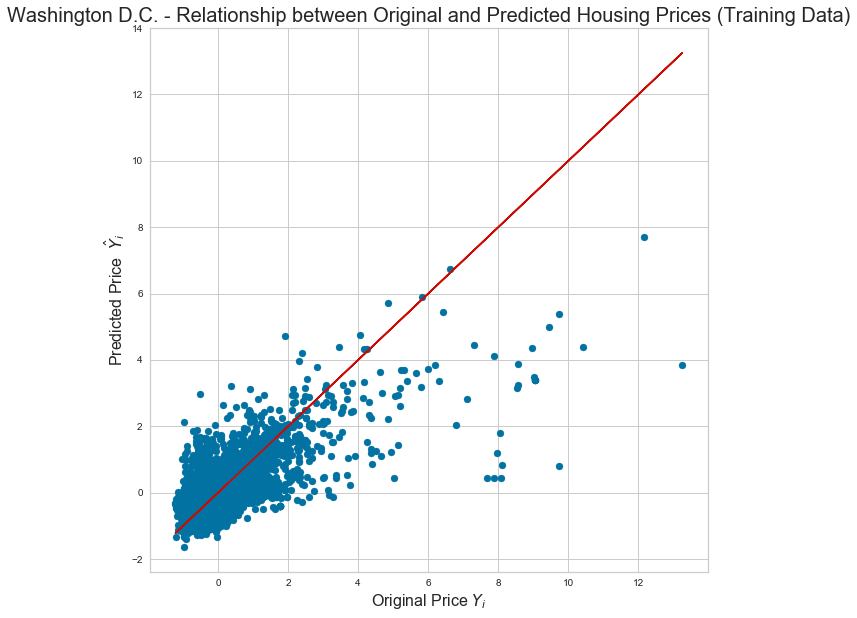

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(dc_train.price, lm_dc.fittedvalues)
plt.plot(dc_train.price, dc_train.price, 'r-')
plt.xlabel("Original Price $Y_i$", fontsize = 16)
plt.ylabel("Predicted Price  $\hat{Y}_i$", fontsize = 16)
plt.title("Washington D.C. - Relationship between Original and Predicted Housing Prices (Training Data)", fontsize=20)
plt.show()

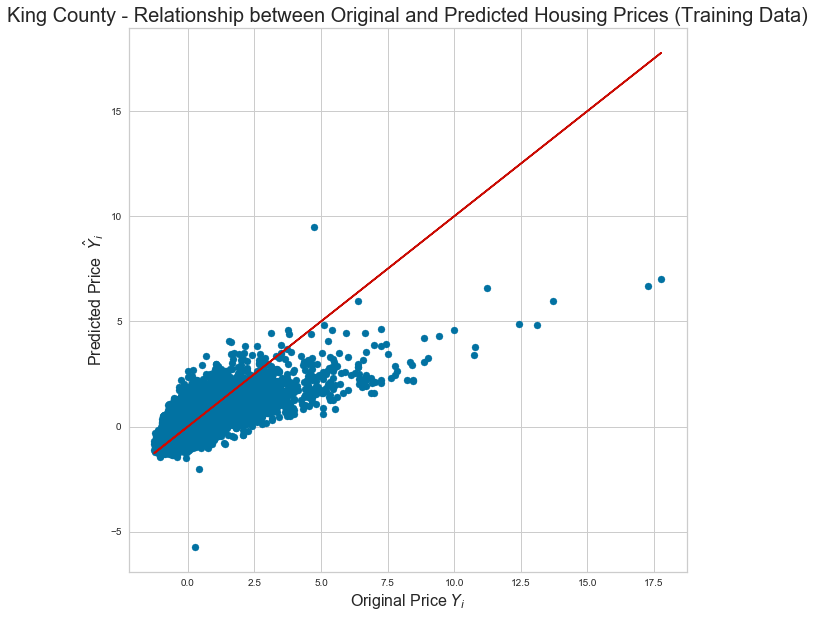

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(kc_train.price, lm_kc.fittedvalues)
plt.plot(kc_train.price, kc_train.price, 'r-')
plt.xlabel("Original Price $Y_i$", fontsize = 16)
plt.ylabel("Predicted Price  $\hat{Y}_i$", fontsize = 16)
plt.title("King County - Relationship between Original and Predicted Housing Prices (Training Data)", fontsize=20)
plt.show()

## Evaluation of the Model: R-squared values
The coefficient of determination, $R^2$, signifies the percentage of the variance in the housing sale prices that can be explained by each linear regression model. Higher $R^2$ values means that a higher percentage of the variance is explained by the model. By comparing the $R^2$ values of each model on the training and test data, I can see how the explained variance changes for predictions by the model. 

In [11]:
print("Washington D.C. Training Adjusted R-Squared:", lm_dc.rsquared_adj)

Washington D.C. Training Adjusted R-Squared: 0.5130895640248121


In [12]:
print("King County Training Adjusted R-Squared:", lm_kc.rsquared_adj)

King County Training Adjusted R-Squared: 0.5560741516357698


The reason I am using the adjusted $R^2$ value is because this value can increase AND decrease based on additional features being used in the linear regression model. If unecessary features are added to the model, the adjusted $R^2$ will decrease, thus implying that the additional features are unecessary. The $R^2$ value alone can only increase, which means that adding more and more features will inevitably increase the $R^2$ value.

## Evaluation of the Model: Mean Absolute Error
Another metric that I am using to evaluate my model is the mean absolute error. The mean absolute error measures the average magnitude of the errors in a set of predictions, without considering their direction. It helps me determine the average difference between my predicted sale prices and the observed sale prices. I first will look at the MAE for my training data, and then compare this value to my test data to help determine if there is a significant flaw in my model.

In [13]:
print("Washington D.C. Training Mean Absolute Error:", meanabs(dc_train.price, lm_dc.fittedvalues))
print("King County Training Mean Absolute Error:", meanabs(kc_train.price, lm_kc.fittedvalues))
print("Washington D.C. Test Mean Absolute Error:", meanabs(dc_test.price, lm_dc.predict(dc_test)))
print("King County Test Mean Absolute Error:", meanabs(kc_test.price, lm_kc.predict(kc_test)))

Washington D.C. Training Mean Absolute Error: 0.4326660083645144
King County Training Mean Absolute Error: 0.43185433672425727
Washington D.C. Test Mean Absolute Error: 0.4002845605505214
King County Test Mean Absolute Error: 0.4414018780483613


### Goodness of fit on Test Data

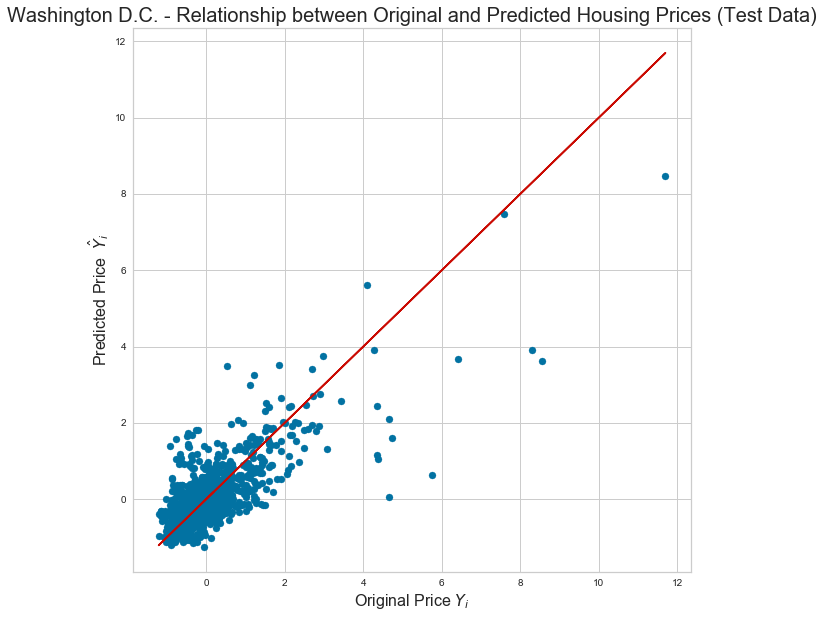

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(dc_test.price, lm_dc.predict(dc_test))
plt.plot(dc_test.price, dc_test.price, 'r-')
plt.xlabel("Original Price $Y_i$", fontsize = 16)
plt.ylabel("Predicted Price  $\hat{Y}_i$", fontsize = 16)
plt.title("Washington D.C. - Relationship between Original and Predicted Housing Prices (Test Data)", fontsize=20)
plt.show()

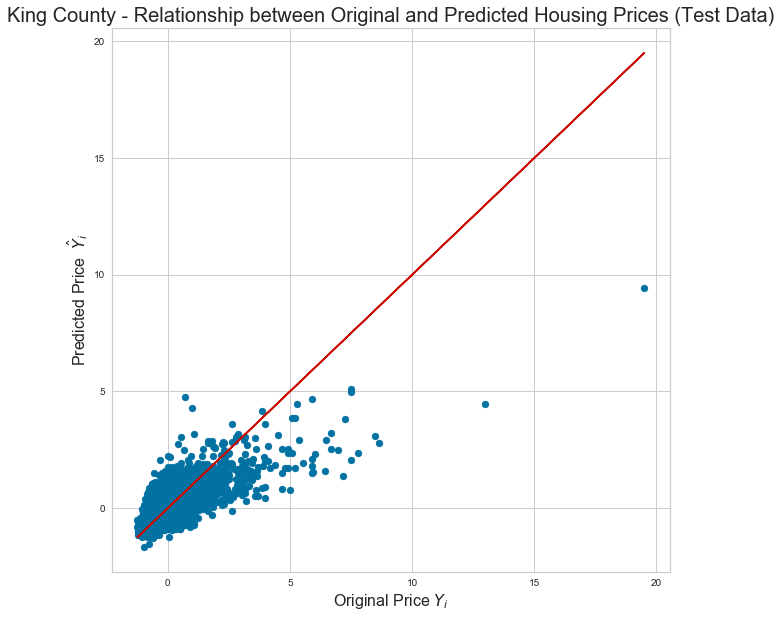

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(kc_test.price, lm_kc.predict(kc_test))
plt.plot(kc_test.price, kc_test.price, 'r-')
plt.xlabel("Original Price $Y_i$", fontsize = 16)
plt.ylabel("Predicted Price  $\hat{Y}_i$", fontsize = 16)
plt.title("King County - Relationship between Original and Predicted Housing Prices (Test Data)", fontsize=20)
plt.show()

There are a few assumptions that Linear Regression models make:
1. The standard deviation of y = 'price' should be constant for different values of X
2. Normal distribution of errors (test for skew of model)
3. Independence between errors (observations are obtained independently)

## Test for Constant Standard Deviation: Fitted vs. Residual Plot

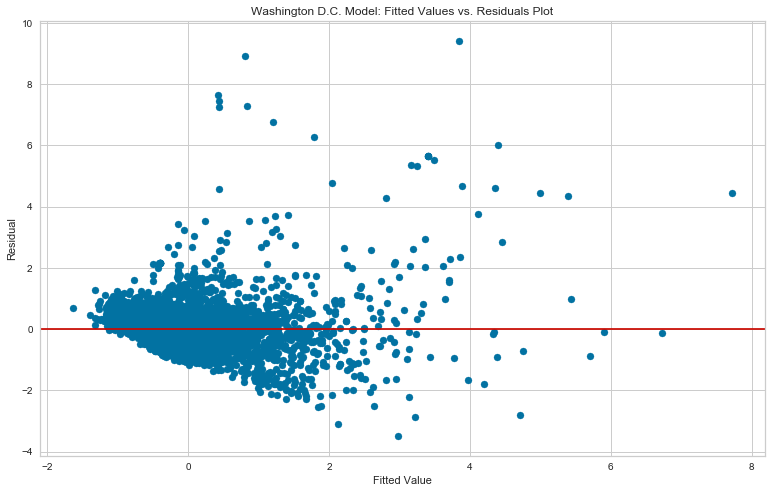

In [16]:
plt.figure(figsize=(13, 8))
plt.scatter(lm_dc.fittedvalues, lm_dc.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Washington D.C. Model: Fitted Values vs. Residuals Plot")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

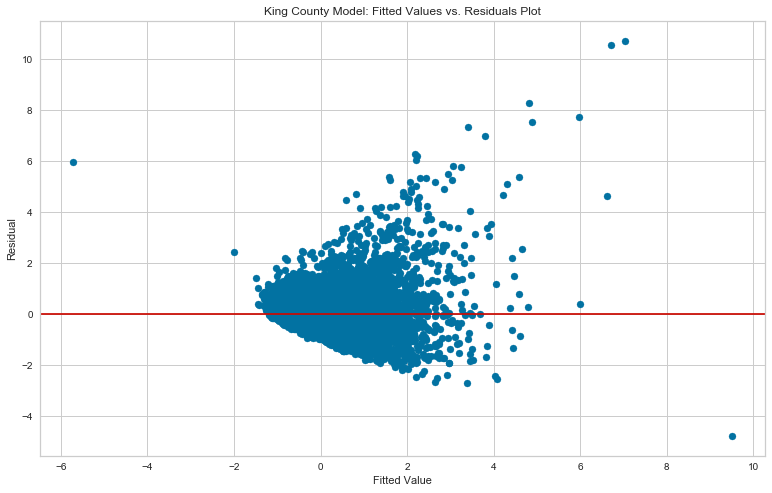

In [17]:
plt.figure(figsize=(13, 8))
plt.scatter(lm_kc.fittedvalues, lm_kc.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("King County Model: Fitted Values vs. Residuals Plot")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

Because there appears to be a 'fanning' effect in the plot, this implies that the standard deviation is not constant for different values of X. For both models, it seems that my models will need some tuning for the features that I choose.

## Test for Normal Distribution of Errors: Quantile Plots

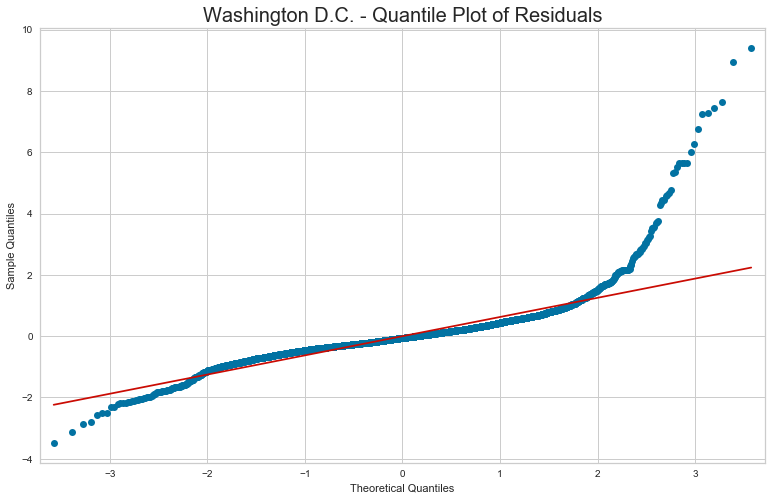

In [18]:
fig = sm.qqplot(lm_dc.resid, line='r')

fig.set_size_inches(13,8)
plt.title("Washington D.C. - Quantile Plot of Residuals", fontsize=20)
plt.show()

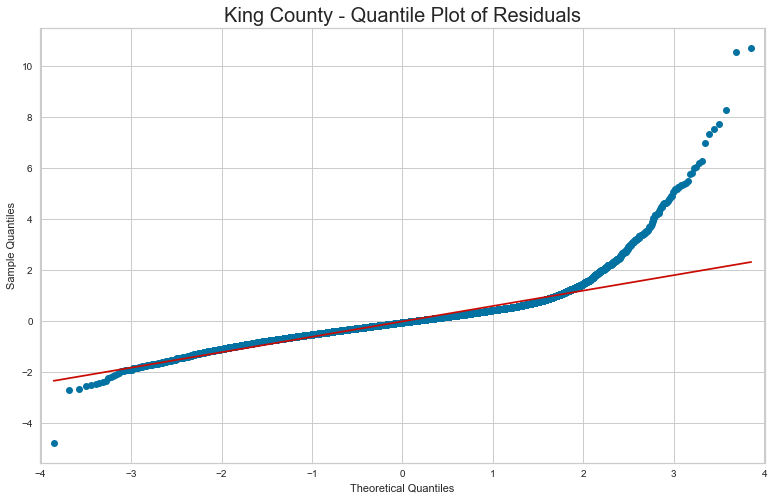

In [19]:
fig = sm.qqplot(lm_kc.resid, line='r')

fig.set_size_inches(13,8)
plt.title("King County - Quantile Plot of Residuals", fontsize=20)
plt.show()

The red line on the plot above signifies a normal distribution of errors. If the errors of each model were normally distributed, they should follow the red line. However, it appears that for both Washington D.C.'s model and King County's model there are clusters of values that deviate from the line, meaning that my model can improve. The points that deviate from the line could be considered outliers and may affect the overall accuracy of each model.

## Test for Outliers: Leverage Plot

It is important to identify high leverage points in each model. Points with high leverage are points that have an extreme predictor value and impact the model's coefficient values. These points are important to distinguish to see if it would be better to exclude them when building the model.

### Washington D.C. Leverage Plot

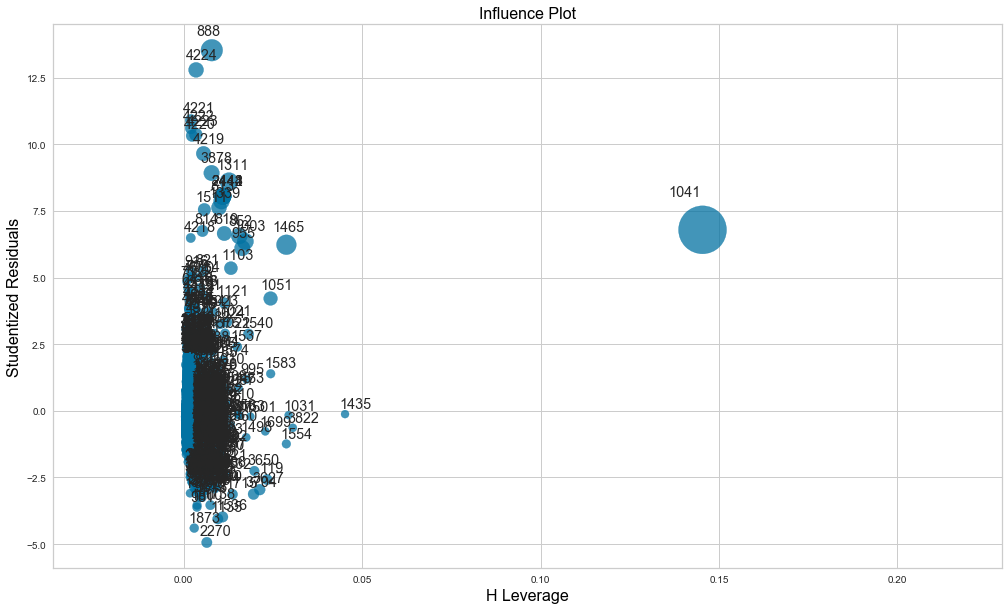

In [20]:
fig = sm.graphics.influence_plot(lm_dc)

fig.set_size_inches(17,10)
plt.show()

In [21]:
dc_df.mean(axis=0)

price           627126.845391
bathrooms            2.167668
bedrooms             2.556564
sqft_living       1715.277034
sqft_lot          1875.414106
floors               2.051103
condition            3.403073
grade                5.949441
yr_built          1946.138408
yr_renovated      1299.470251
month                6.564804
dtype: float64

In [22]:
dchigh_leverage = dc_df.iloc[np.where([1041, 1138])]
dchigh_leverage

,price,bathrooms,bedrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,month
0,993500,5.0,3,1148.0,814,2.0,6,1,1907,2014,10
1,1280000,2.5,3,1630.0,1000,2.0,3,8,1906,2004,8


### King County Leverage Plot

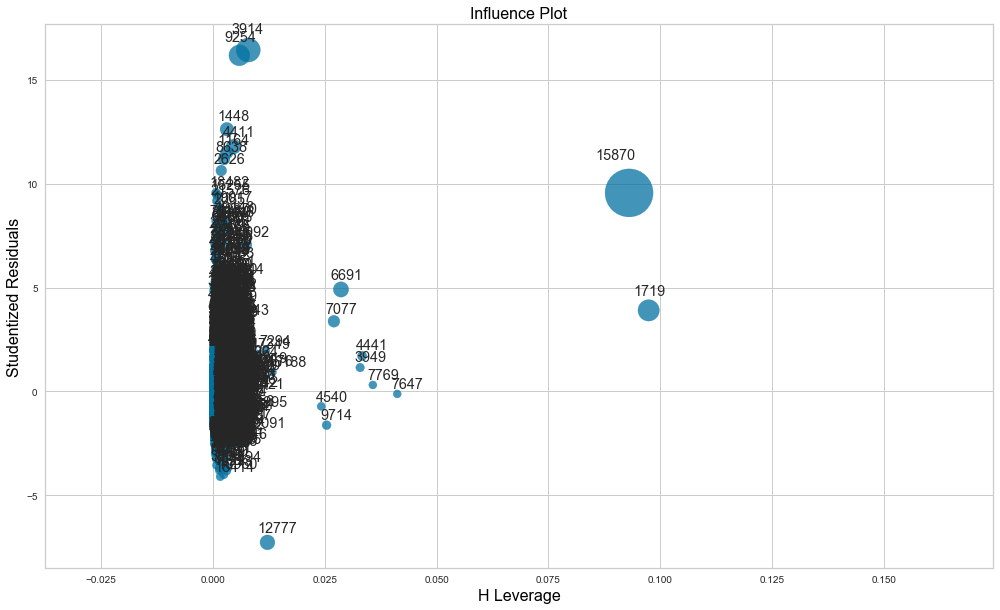

In [23]:
fig = sm.graphics.influence_plot(lm_kc)

fig.set_size_inches(17,10)
plt.show()

In [24]:
kc_df.mean(axis=0)

price           540088.141767
bathrooms            2.114757
bedrooms             3.370842
sqft_living       2079.899736
sqft_lot         15106.967566
floors               1.494309
condition            2.432286
grade                5.084625
yr_built          1971.005136
yr_renovated        84.402258
month                6.574423
dtype: float64

In [25]:
kchigh_leverage = kc_df.iloc[np.where([15870, 1719])]
kchigh_leverage

,price,bathrooms,bedrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,month
0,221900.0,1.00,3,1180.0,5650,1.0,2,2,1955,0,10
1,538000.0,2.25,3,2570.0,7242,2.0,2,2,1951,1991,12


## Feature Selection: Lasso Regression
One benefit of using Lasso Regression is to help induce sparsity into the model. Although my previous linear regression models from above do not drastically overfit the data (the adjusted R-squared values and Mean Absolute Values are not extreme between the test and data set to imply overfitting of the model), I would still like to introduce some form of feature selection to the models' predictor variables. Lasso Regression zeros out variables that have a high penalty for the model, thus eliminating poor predictor variables.

In [26]:
X_dc = dc_df_scaled.drop('price', axis = 1)
X_kc = kc_df_scaled.drop('price', axis = 1)

# Separate training and test data for each model
Xdc_train, Xdc_test, ydc_train, ydc_test = train_test_split(X_dc, dc_df_scaled.price, test_size=0.2, random_state=0)
Xkc_train, Xkc_test, ykc_train, ykc_test = train_test_split(X_kc, kc_df_scaled.price, test_size=0.2, random_state=0)

# Lasso Regression models
dc_lasso = Lasso(alpha=0.01, max_iter=10e5)
kc_lasso = Lasso(alpha=0.01, max_iter=10e5)

# Fit Lasso models
dc_lasso.fit(Xdc_train, ydc_train)
kc_lasso.fit(Xkc_train, ykc_train)

# Training Score
dc_train_score=dc_lasso.score(Xdc_train, ydc_train)
kc_train_score=kc_lasso.score(Xkc_train, ykc_train)

# Test Score
dc_test_score=dc_lasso.score(Xdc_test,ydc_test)
kc_test_score=kc_lasso.score(Xkc_test,ykc_test)

# Number of coefficients used in each model
dc_coeff_used = np.sum(dc_lasso.coef_!=0)
kc_coeff_used = np.sum(dc_lasso.coef_!=0)

print("Washington D.C. training score:", dc_train_score) 
print("Washington D.C. test score:", dc_test_score)
print("Washington D.C. number of features used:", dc_coeff_used)
print("")
print("King County training score:", kc_train_score) 
print("King County test score:", kc_test_score)
print("King County number of features used:", kc_coeff_used)

Washington D.C. training score: 0.5354283146472496
Washington D.C. test score: 0.4735110417537456
Washington D.C. number of features used: 8

King County training score: 0.5580081980330058
King County test score: 0.5460385081058753
King County number of features used: 8


### Washington D.C. Lasso Regression Model Coefficients

In [27]:
pd.DataFrame({'features': X_dc.columns, 'estimatedCoefficients': dc_lasso.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,bathrooms,0.400750
1,bedrooms,0.000000
2,sqft_living,0.351308
3,sqft_lot,0.059128
4,floors,0.049667
5,condition,0.034085
6,grade,0.086690
7,yr_built,-0.073350
8,yr_renovated,-0.007563
9,month,-0.000000


### King County Lasso Regression Model Coefficients

In [28]:
pd.DataFrame({'features': X_kc.columns, 'estimatedCoefficients': kc_lasso.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,bathrooms,0.114235
1,bedrooms,-0.141313
2,sqft_living,0.749540
3,sqft_lot,-0.021016
4,floors,0.070464
5,condition,0.000000
6,grade,-0.000000
7,yr_built,-0.238361
8,yr_renovated,0.018938
9,month,-0.013999


## Evaluation of the Model: Mean Absolute Error

In [29]:
# Define the predictions of each lasso model
dc_lasso_predictions = dc_lasso.predict(Xdc_test)
kc_lasso_predictions = kc_lasso.predict(Xkc_test)

print("Washington D.C. Test Mean Absolute Error:", meanabs(ydc_test, dc_lasso_predictions))
print("King County Test Mean Absolute Error:", meanabs(ykc_test, kc_lasso_predictions))

Washington D.C. Test Mean Absolute Error: 0.4259443903870488
King County Test Mean Absolute Error: 0.4244899316228654


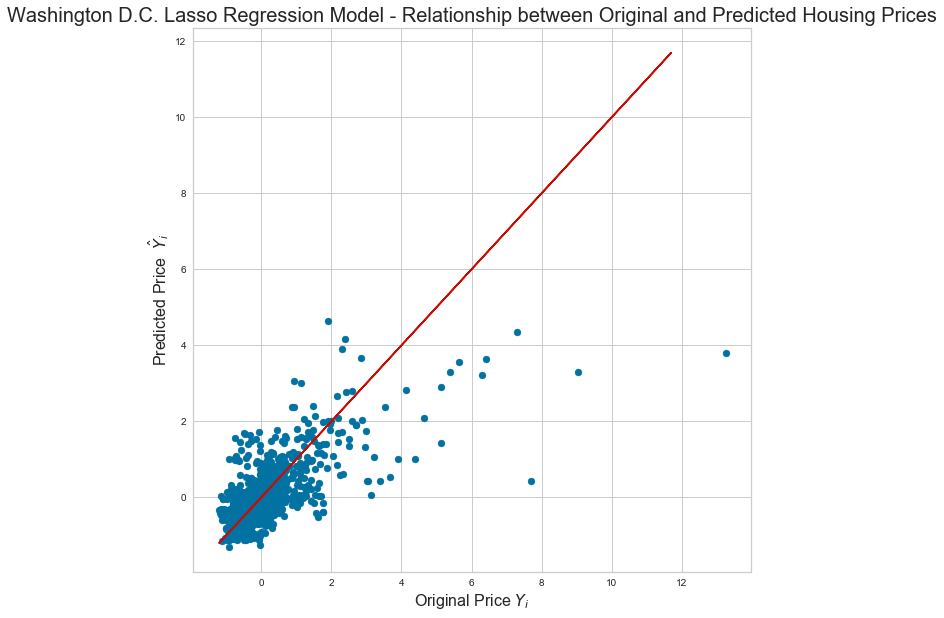

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(ydc_test, dc_lasso_predictions)
plt.plot(dc_test.price, dc_test.price, 'r-')
plt.xlabel("Original Price $Y_i$", fontsize = 16)
plt.ylabel("Predicted Price  $\hat{Y}_i$", fontsize = 16)
plt.title("Washington D.C. Lasso Regression Model - Relationship between Original and Predicted Housing Prices", fontsize=20)
plt.show()

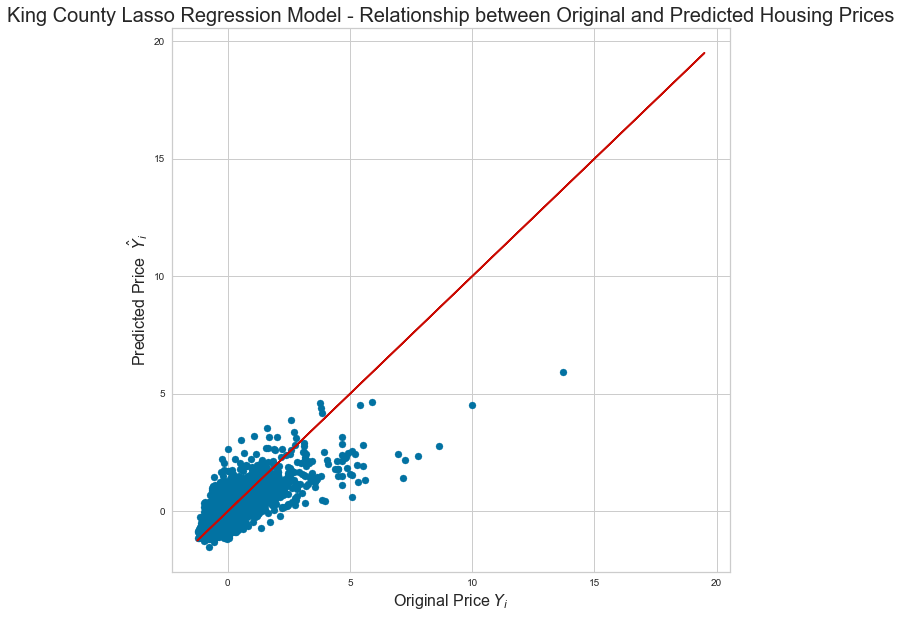

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(ykc_test, kc_lasso_predictions)
plt.plot(kc_test.price, kc_test.price, 'r-')
plt.xlabel("Original Price $Y_i$", fontsize = 16)
plt.ylabel("Predicted Price  $\hat{Y}_i$", fontsize = 16)
plt.title("King County Lasso Regression Model - Relationship between Original and Predicted Housing Prices", fontsize=20)
plt.show()

## Test for Constant Standard Deviation: Predictions vs. Residual Plot

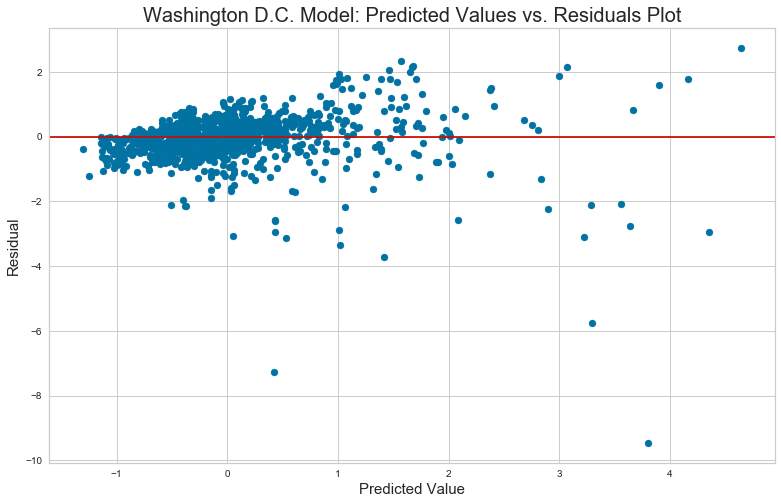

In [32]:
plt.figure(figsize=(13, 8))
plt.scatter(dc_lasso_predictions, dc_lasso_predictions - ydc_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Washington D.C. Model: Predicted Values vs. Residuals Plot", fontsize=20)
plt.xlabel("Predicted Value", fontsize=15)
plt.ylabel("Residual", fontsize=15)
plt.show()

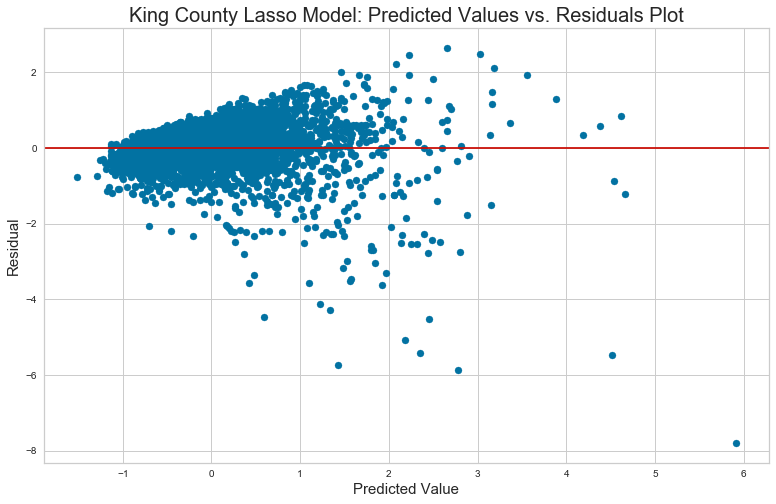

In [33]:
plt.figure(figsize=(13, 8))
plt.scatter(kc_lasso_predictions, kc_lasso_predictions - ykc_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("King County Lasso Model: Predicted Values vs. Residuals Plot", fontsize=20)
plt.xlabel("Predicted Value", fontsize=15)
plt.ylabel("Residual", fontsize=15)
plt.show()

## Test for Normal Distribution of Errors: Quantile Plots

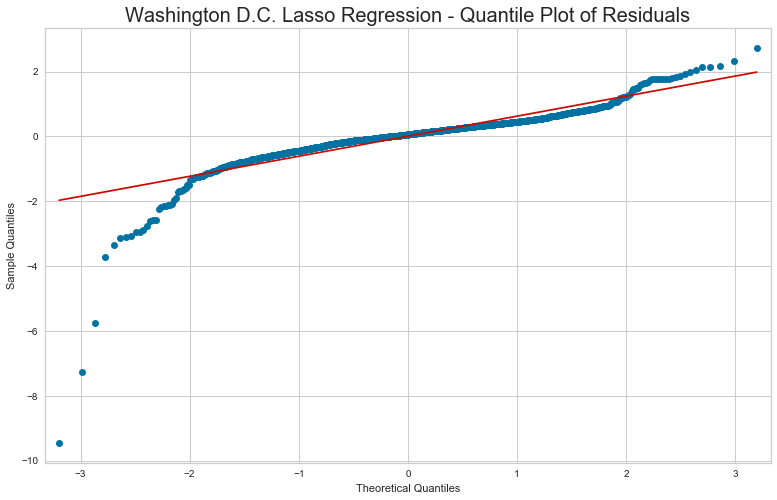

In [34]:
fig = sm.qqplot((dc_lasso_predictions - ydc_test), line='r')

fig.set_size_inches(13,8)
plt.title("Washington D.C. Lasso Regression - Quantile Plot of Residuals", fontsize=20)
plt.show()

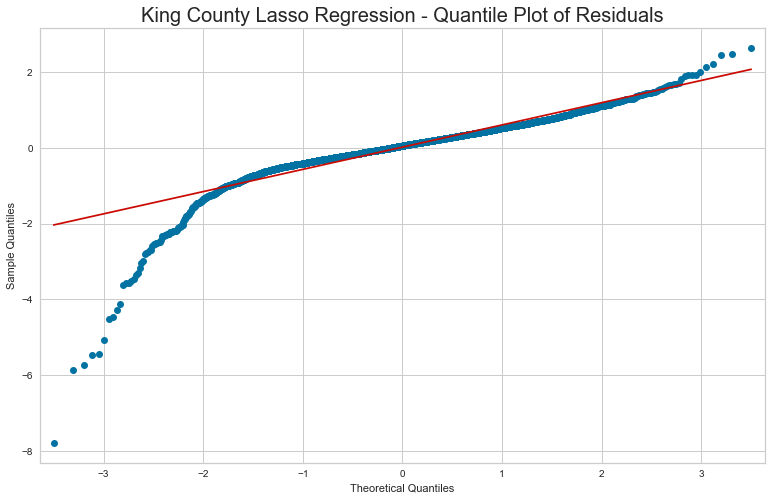

In [35]:
fig = sm.qqplot((kc_lasso_predictions - ykc_test), line='r')

fig.set_size_inches(13,8)
plt.title("King County Lasso Regression - Quantile Plot of Residuals", fontsize=20)
plt.show()

## Feature Selection: Forward Regression

Because my models do not completely fit the assumptions mentioned above, I will perform forward regression on each model to select the features that best describe the data. I will begin by building my model with one feature, selecting the feature that increases the R-squared metric the most *and* decreases the mean absolute error the most (the best descriptor). This feature must also have a p-value lower than 0.05 meaning that it is a significant predictor. Once this model is built, I will rebuild the model again with this feature and each other feature. I will continue this until I cannot add any other housing features that have a p-value lower than 0.05. 

In [36]:
# def forward_regression(df, columns):
#     """Fuunction that selects features using forward regression"""
#     features = 'price ~ '
#     highest_r = 0
#     lowest_mae = math.inf
#     best_model = None
    
#     while len(columns) > 0:
#         best_feature = None
#         curr_best_r = 0
#         curr_best_mae = math.inf
        
#         for c in columns:
#             if features == 'price ~ ':
#                 test_features = features + c
#                 model = ols(test_features, df).fit()
#             else:
#                 test_features = features + '+' + c
#                 model = ols(test_features, df).fit()
#             if (model.rsquared_adj >= highest_r) and (meanabs(df.price, model.fittedvalues) <= lowest_mae) and model.pvalues[c] <= 0.05:
#                 if (model.rsquared_adj > curr_best_r) and (meanabs(df.price, model.fittedvalues) < curr_best_mae):
#                     curr_best_r = model.rsquared_adj
#                     curr_best_mae = meanabs(df.price, model.fittedvalues)
#                     best_feature = c
#         if best_feature:
#             if features == 'price ~ ':
#                 features = features + best_feature
#             else:
#                 features = features + ' + ' + best_feature
#             best_model = model
#             columns.remove(best_feature)
#         else:
#             return best_model

In [37]:
# columns = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 
#            'condition', 'grade', 'yr_built', 'yr_renovated', 'month']
# lm_dc_forward = forward_regression(dc_train, columns)

In [38]:
# columns = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 
#            'condition', 'grade', 'yr_built', 'yr_renovated', 'month']
# lm_kc_forward = forward_regression(kc_train, columns)

In [39]:
# lm_dc_forward.summary()

In [40]:
# lm_kc_forward.summary()